In [56]:
import mne
from pyprep.prep_pipeline import PrepPipeline
import numpy as np

raw = mne.io.read_raw_edf('0_20170803_130350.edf', preload=True)


Extracting EDF parameters from c:\Users\itsay\Desktop\pyprep\0_20170803_130350.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1325349  =      0.000 ...  5301.396 secs...


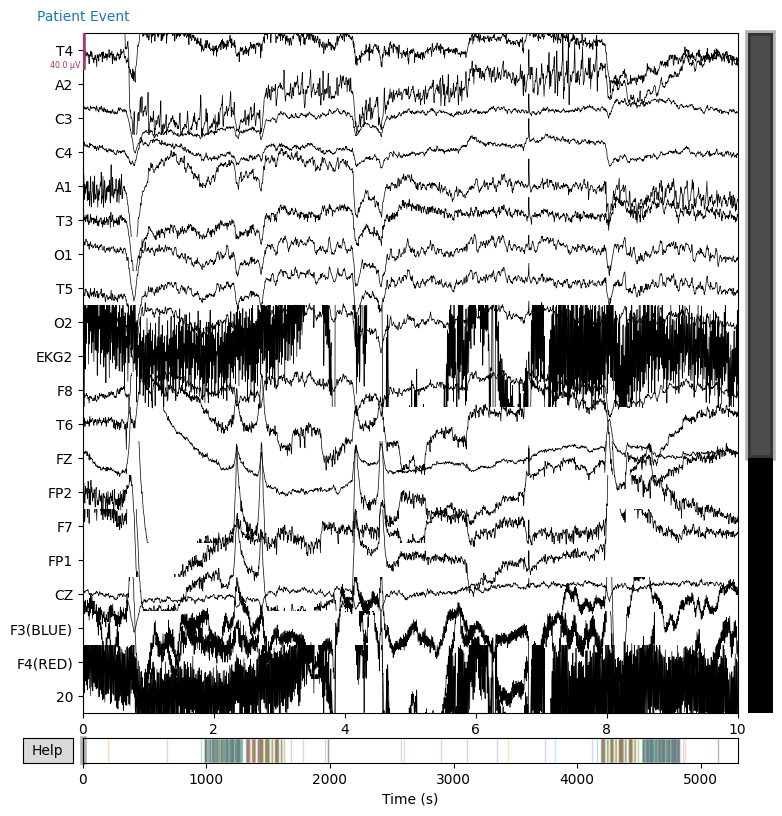

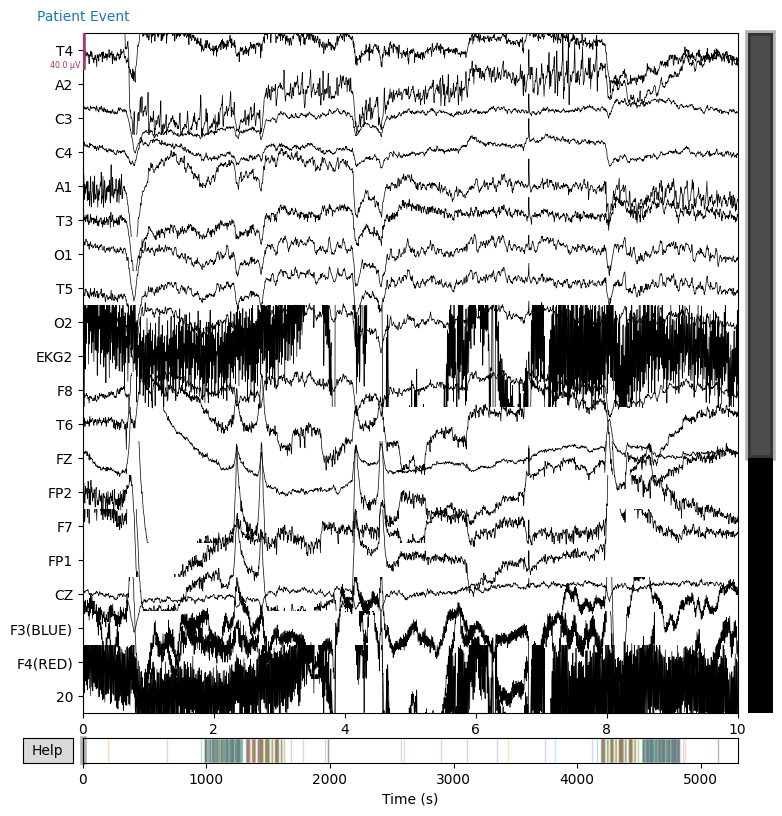

In [57]:
raw.plot()

In [58]:
#the channels that are present in the montage
montage_channels = ['T4', 'A2', 'C3', 'C4', 'A1', 'T3', 'O1', 'T5', 'O2', 
                    'F8', 'T6', 'FZ', 'FP2', 'F7', 'FP1', 'CZ']

# Pick only the channels that are part of the montage
raw.pick_channels(montage_channels)

# Verify that only the desired channels are left
print(raw.info['ch_names'])

# Now set the montage



NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
['T4', 'A2', 'C3', 'C4', 'A1', 'T3', 'O1', 'T5', 'O2', 'F8', 'T6', 'FZ', 'FP2', 'F7', 'FP1', 'CZ']


In [59]:
# Print all channel names in the raw data
print("Channels in raw data:", raw.info['ch_names'])


Channels in raw data: ['T4', 'A2', 'C3', 'C4', 'A1', 'T3', 'O1', 'T5', 'O2', 'F8', 'T6', 'FZ', 'FP2', 'F7', 'FP1', 'CZ']


In [61]:

available_channels = [ch for ch in montage_channels if ch in raw.info['ch_names']]
print("Available channels for montage:", available_channels)

# Update channel positions to match available channels
channel_positions = np.array([
    [5.18e-15, -84.5, -8.85],  # T4
    [3.68e-15, -60.1, -60.1],  # A2
    [3.87e-15, 63.2, 56.9],    # C3
    [-3.87e-15, -63.2, 56.9],  # C4
    [3.68e-15, 60.1, -60.1],   # A1
    [5.18e-15, 84.5, -8.85],   # T3
    [-80.8, 26.1, -4],         # O1
    [-49.9, 68.4, -7.49],      # T5
    [-80.8, -26.1, -4],        # O2
    [49.9, -68.4, -7.49],      # F8
    [-49.9, -68.4, -7.49],     # T6
    [60.7, 0, 59.5],           # FZ
    [80.8, -26.1, -4],         # FP2
    [49.9, 68.4, -7.49],       # F7
    [80.8, 26.1, -4],          # FP1
    [5.2e-15, 0, 85],          # CZ
    [57.6, 48.2, 39.9],        # F3
    [57.6, -48.1, 39.9],       # F4
    [32.9, 0, 78.4]            # FCz
])

# Adjust positions array to match available channels
positions_dict = dict(zip(available_channels, channel_positions))
positions_dict = {ch: positions_dict[ch] for ch in available_channels if ch in positions_dict}
channel_positions = np.array([positions_dict[ch] for ch in available_channels])

# Create the montage with the updated channel positions
montage = mne.channels.make_dig_montage(
    ch_pos=dict(zip(available_channels, channel_positions)), 
    coord_frame='head'
)


Available channels for montage: ['T4', 'A2', 'C3', 'C4', 'A1', 'T3', 'O1', 'T5', 'O2', 'F8', 'T6', 'FZ', 'FP2', 'F7', 'FP1', 'CZ']


In [62]:
print(raw.info['ch_names'])

['T4', 'A2', 'C3', 'C4', 'A1', 'T3', 'O1', 'T5', 'O2', 'F8', 'T6', 'FZ', 'FP2', 'F7', 'FP1', 'CZ']


In [63]:
# Initialize the pipeline
prep_params = {
    'ref_chs': 'eeg',    # Reference channels, or 'average' for average reference
    'reref_chs': 'eeg',      # Channels to rereference
    'line_freqs': [50, 60],  # Frequencies to remove line noise
}

# Create the PREP pipeline
prep = PrepPipeline(raw, prep_params, montage)

# Run the pipeline
prep.fit()

# Get cleaned data
cleaned_eeg = prep.raw


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)

Removed notch frequencies (Hz):
     50.00 : 16944 windows
     60.00 : 16944 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequen

  0%|          |  : 0/1060 [00:00<?,       ?it/s]


RANSAC done!


2024-09-08 09:12:53,348 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['A2'], 'bad_by_hf_noise': ['T4', 'A2'], 'bad_by_correlation': ['A2', 'T3', 'T6', 'F7', 'CZ'], 'bad_by_SNR': ['A2'], 'bad_by_dropout': [], 'bad_by_ransac': ['FP2', 'FP1'], 'bad_all': ['T6', 'T3', 'FP1', 'FP2', 'T4', 'CZ', 'A2', 'F7']}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/1060 [00:00<?,       ?it/s]


RANSAC done!


2024-09-08 09:13:10,366 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['A2'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['C4', 'T3', 'C3', 'T4', 'CZ', 'A2', 'A1', 'F7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [], 'bad_all': ['C4', 'T3', 'C3', 'T4', 'CZ', 'A2', 'A1', 'F7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 85008.7 mm
Computing interpolation matrix from 8 sensor positions
Interpolating 8 sensors


c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyprep\reference.py:310: RuntimeWarning: Only 10 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  raw_tmp.interpolate_bads()
c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyprep\reference.py:310: RuntimeWarning: Estimated head radius (8500.9 cm) is above the 99th percentile for adult head size.
  raw_tmp.interpolate_bads()
2024-09-08 09:13:10,764 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/1060 [00:00<?,       ?it/s]


RANSAC done!


2024-09-08 09:13:29,878 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['A2'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T6', 'C4', 'T3', 'C3', 'T4', 'CZ', 'A2', 'A1', 'F7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['F8'], 'bad_all': ['T6', 'F8', 'C4', 'T3', 'C3', 'T4', 'CZ', 'A2', 'A1', 'F7']}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 85008.7 mm
Computing interpolation matrix from 6 sensor positions
Interpolating 10 sensors


c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyprep\reference.py:310: RuntimeWarning: Only 10 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  raw_tmp.interpolate_bads()
c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyprep\reference.py:310: RuntimeWarning: Estimated head radius (8500.9 cm) is above the 99th percentile for adult head size.
  raw_tmp.interpolate_bads()
2024-09-08 09:13:30,238 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/1060 [00:00<?,       ?it/s]


RANSAC done!


2024-09-08 09:13:50,059 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': [], 'bad_by_deviation': ['A2'], 'bad_by_hf_noise': [], 'bad_by_correlation': ['T6', 'C4', 'T3', 'C3', 'T4', 'CZ', 'A2', 'A1', 'F7'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': ['F8'], 'bad_all': ['T6', 'F8', 'C4', 'T3', 'C3', 'T4', 'CZ', 'A2', 'A1', 'F7']}
2024-09-08 09:13:50,059 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 85008.7 mm


c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyprep\reference.py:129: RuntimeWarning: Only 10 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  dummy.interpolate_bads()
c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyprep\reference.py:129: RuntimeWarning: Estimated head radius (8500.9 cm) is above the 99th percentile for adult head size.
  dummy.interpolate_bads()


Computing interpolation matrix from 6 sensor positions
Interpolating 10 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)

Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/1060 [00:00<?,       ?it/s]


RANSAC done!
Found 7 uniquely bad channels:

0 by NaN: []

0 by flat: []

1 by deviation: ['A2']

0 by HF noise: []

7 by correlation: ['T4', 'A2', 'A1', 'T3', 'T6', 'FZ', 'F7']

0 by SNR: []

0 by dropout: []

0 by RANSAC: []

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 85008.7 mm
Computing interpolation matrix from 9 sensor positions
Interpolating 7 sensors


c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyprep\reference.py:159: RuntimeWarning: Only 10 head digitization points of the specified kinds ("eeg", "extra",), fitting may be inaccurate
  self.raw.interpolate_bads()
c:\Users\itsay\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyprep\reference.py:159: RuntimeWarning: Estimated head radius (8500.9 cm) is above the 99th percentile for adult head size.
  self.raw.interpolate_bads()


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)

Executing RANSAC
This may take a while, so be patient...


  0%|          |  : 0/1060 [00:00<?,       ?it/s]


RANSAC done!


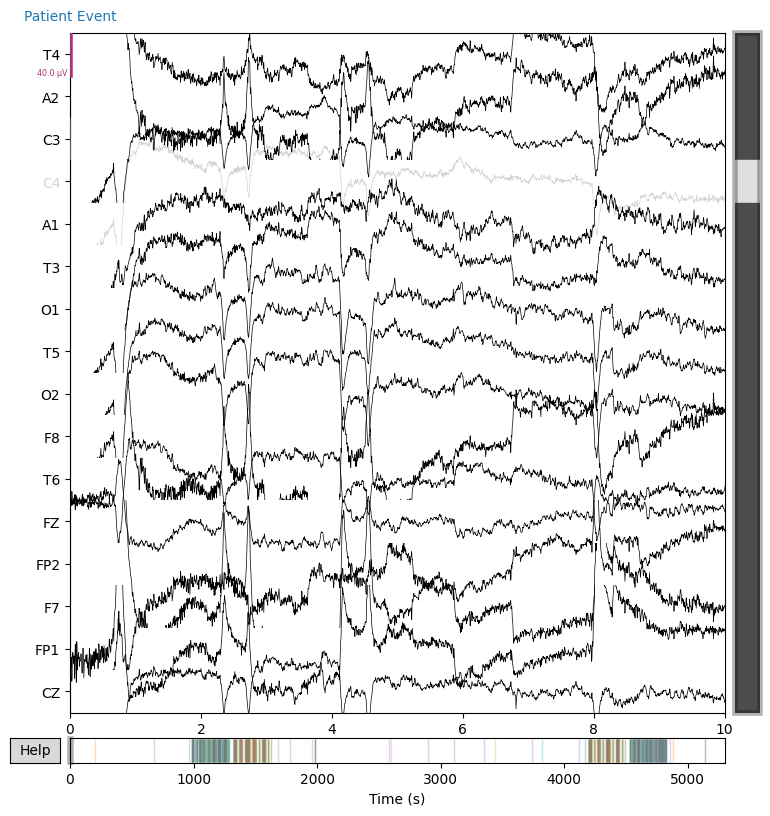

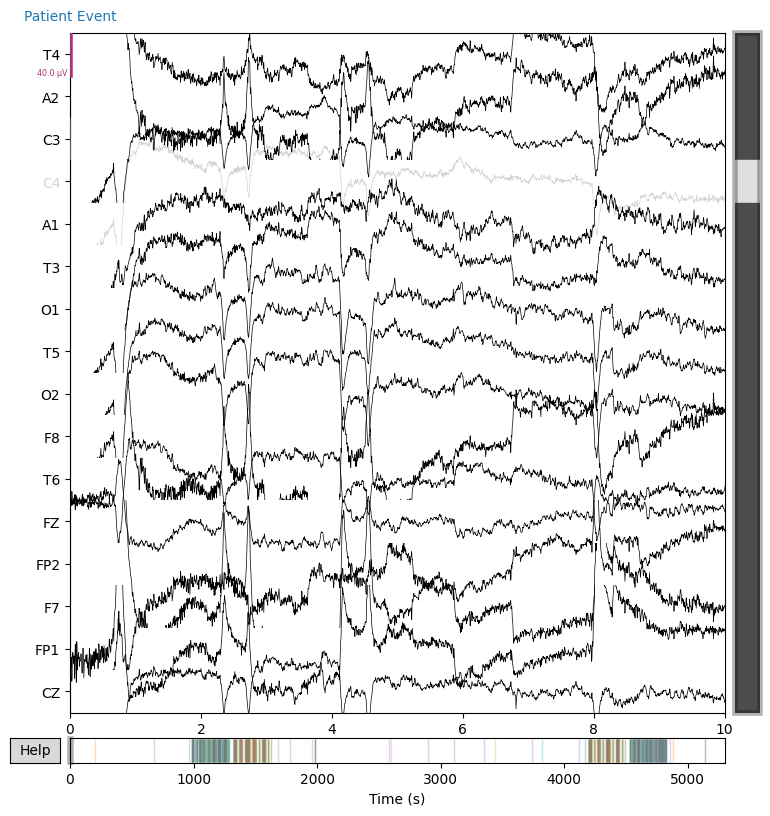

In [47]:
cleaned_eeg.plot()